## Hello PyTorch

This notebook will teach you to use PyTorch low-level core. If you're running this notebook outside the course environment, you can install it here.

PyTorch feels differently than Tensorflow on almost every level. TensorFlow makes your code live in two "worlds" simultaneously: symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data. In PyTorch, there's only one world: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: PyTorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. And a few more things.

And now we finally shut up and let PyTorch do the talking.

In [ ]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week04_%5Brecap%5D_deep_learning/notmnist.py
    !touch .setup_complete

In [ ]:
import numpy as np
import torch
print(torch.__version__)

1.11.0+cu113


In [ ]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X:\n%s\n" % x)
print("X.shape: %s\n" % (x.shape,))
print("add 5:\n%s\n" % (x + 5))
print("X*X^T:\n%s\n" % np.dot(x, x.T))
print("mean over rows:\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols:\n%s\n" % (np.cumsum(x, axis=0)))

X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape: (4, 4)

add 5:
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T:
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over rows:
[ 1.5  5.5  9.5 13.5]

cumsum of cols:
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [ ]:
# PyTorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0, 16).view(4, 4)

print("X:\n%s" % x)
print("X.shape: %s\n" % (x.shape,))
print("add 5:\n%s" % (x + 5))
print("X*X^T:\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over rows:\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols:\n%s" % torch.cumsum(x, dim=0))

X:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape: torch.Size([4, 4])

add 5:
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T:
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over rows:
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


### NumPy and PyTorch
As you can notice, PyTorch allows you to hack stuff much the same way you did with NumPy. No graph declaration, no placeholders, no sessions. This means that you can see the numeric value of any tensor at any moment of time. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. PyCharm debugger or gdb).

You could also notice the a few new method names and a different API. So no, there's no compatibility with NumPy yet and yes, you'll have to memorize all the names again. Get excited!

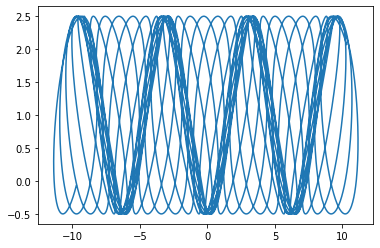

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x = t - 1.5*np.cos(14*t)
y = 1 - 1.5*np.sin(15*t)

plt.plot(x.numpy(), y.numpy())



---

### Automatic gradients
Any self-respecting DL framework must do your backprop for you. Torch handles this with the autograd module.

The general pipeline looks like this:

* When creating a tensor, you mark it as `requires_grad:`
 * `torch.zeros(5, requires_grad=True)`
 * `torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)`* 
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as a.grad

Here's an example: let's fit a linear regression on Boston house prices.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

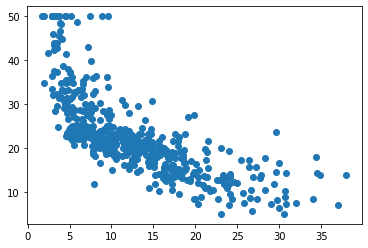

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagate gradients
loss.backward()

In [ ]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)   

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


If you compute gradient from multiple losses, the gradients will add up at variables, therefore it's useful to **zero the gradients** between iteratons.



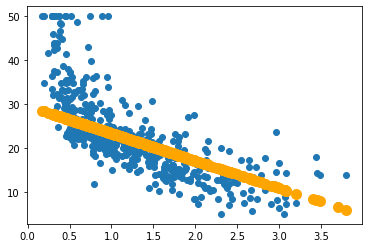

loss =  44.59417


In [ ]:
from IPython.display import clear_output

for i in range(100):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.numpy(), y.numpy())
        plt.scatter(x.detach().numpy(), y_pred.detach().numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.detach().numpy())
        if loss.detach().numpy() < 0.5:
            print("Done!")
            break

## High-level PyTorch
So far we've been dealing with low-level PyTorch API. While it's absolutely vital for any custom losses or layers, building large neural nets in it is a bit clumsy.

Luckily, there's also a high-level PyTorch interface with pre-defined layers, activations and training algorithms.

We'll cover them as we go through a simple image recognition problem: classifying letters into "A" vs "B".

In [ ]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i" % (len(X_train), len(X_test)))

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
Train size = 2808, test_size = 937


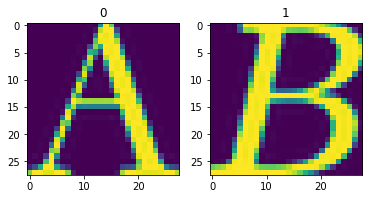

In [ ]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

In [ ]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

In [ ]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit.
model.add_module('l1', nn.Linear(784, 1))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

In [ ]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [ ]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

tensor([0.4902, 0.5009, 0.4748], grad_fn=<SelectBackward0>)

In [ ]:
crossentropy = torch.tensor([y[i]*np.log2(y_predicted[i].clone().detach().numpy()) for i in range(len(y))])

loss = torch.mean(-crossentropy)

assert tuple(crossentropy.size()) == (
    3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == tuple(
), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy() > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= np.log(
    3), "Loss is too large even for untrained model. Please double-check it."


**Torch optimizers**

When we trained Linear Regression above, we had to manually `.zero_()` gradients on both our variables. Imagine that code for a 50-layer network.

Again, to keep it from getting dirty, there's `torch.optim` module with pre-implemented algorithms:

In [ ]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.01)

# here's how it's used:
opt.zero_grad()      # clear gradients
loss.requires_grad = True
loss.backward()      # add new gradients
opt.step()           # change weights


In [ ]:
# dispose of old variables to avoid bugs later
del x, y, y_predicted, loss, y_pred

In [ ]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
history = []

for i in range(100):

    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)

    # predict probabilities
    y_predicted = model(x_batch)[:, 0]

    assert y_predicted.dim(
    ) == 1, "did you forget to select first column with [:, 0]"

    # compute loss, just like before
    crossentropy = torch.tensor([y_batch[i]*np.log2(y_predicted[i].clone().detach().numpy()) for i in range(len(y_batch))])
    loss = torch.mean(-crossentropy)

    # compute gradients
    opt.zero_grad() 
    loss.requires_grad = True
    loss.backward()

    # Adam step
    opt.step() 

    # clear gradients
    opt.zero_grad()

    history.append(loss.data.numpy())

    # print(y_batch, y_predicted)

    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.434
step #10 | mean loss = 0.464
step #20 | mean loss = 0.448
step #30 | mean loss = 0.426
step #40 | mean loss = 0.445
step #50 | mean loss = 0.451
step #60 | mean loss = 0.448
step #70 | mean loss = 0.422
step #80 | mean loss = 0.434
step #90 | mean loss = 0.416


Evaluation

Let's see how our model performs on test data

In [ ]:
# use your model to predict classes (0 or 1) for all test samples
x_test = torch.tensor(X_test[:], dtype=torch.float32)
y_test = torch.tensor(y_test[:], dtype=torch.float32)
predicted_y_test = model(x_test)[:, 0].detach().numpy()
for i in range(len(predicted_y_test)):
    if predicted_y_test[i] > 0.5:
        predicted_y_test[i]= 1
    else:
        predicted_y_test[i] = 0

assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(
    predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test.detach().numpy()).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)                    ##################   THIS DOESN'T MAKE ANY SENSE TO ME   ######################

print("Test accuracy: %.5f" % accuracy)         
assert accuracy > 0.95, "try training longer"

Test accuracy: 0.00000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


AssertionError: ignored

### Homework tasks

**1.1 The Cannabola (disclaimer)**

Let's write another function, this time in polar coordinates:

Then convert it into cartesian coordinates (howto) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

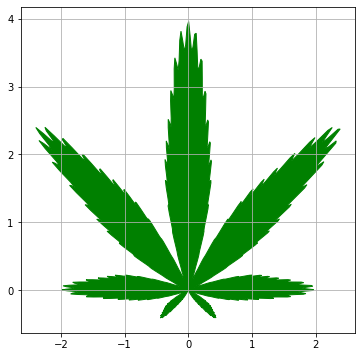

In [ ]:
theta = torch.linspace(- np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (1 + 0.9*np.cos(8*theta))*(1 + 0.1*np.cos(24*theta)) * (0.9 + 0.05*np.cos(200*theta))*(1+np.sin(theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho*np.cos(theta)
y = rho*np.sin(theta)


plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

### Task II: The Game of Life (3 points)
Now it's time for you to make something more challenging. We'll implement Conway's Game of Life in pure PyTorch.

While this is still a toy task, implementing game of life this way has one cool benefit: you'll be able to run it on GPU! Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

img If you've skipped the URL above out of sloth, here's the Game of Life:

You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
Any cell with exactly 3 neighbors becomes alive (if it was dead)
For this task, you are given a reference NumPy implementation that you must convert to PyTorch. [NumPy code inspired by: https://github.com/rougier/numpy-100]

Note: You can find convolution in torch.nn.functional.conv2d(Z,filters). Note that it has a different input format.

Note 2: From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: video tutorial, scipy functions review, stack overflow source.

In [ ]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [ ]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.

    You can opt to create a new tensor or change Z inplace.
    """
    filters = torch.FloatTensor([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])
    
    N = torch.nn.functional.conv2d(Z, filters) 

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive

    return Z

In [ ]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

RuntimeError: ignored

In [ ]:
%matplotlib notebook
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

In [ ]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()